# ML with SKLearn
Joshua Durana rcd180001

In [1]:
import pandas as pd
import sklearn as sk
import seaborn as sb
import numpy as np

## Load Data 

In [14]:
autodf = pd.read_csv('Data/Auto.csv')
print("Head\n", autodf.head())
print("Dimensions: ", autodf.shape)


Head
     mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  
Dimensions:  (392, 9)


## Data Exploration

In [3]:
autodf.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,391.000000,390.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.554220,76.010256,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.750548,3.668093,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.800000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.050000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


- The mpg's range is 37 and the mean is 23. 
- The cylinder's range is 4 and the mean is 5.5 cylinders. 
- The displacement's range is 387 and the mean is 194.4
- The horsepower's range is 184 and the mean is 104.5 
- The weight's range is 3527 and the mean is 2977.6
- The accelearation range is 16.8 and the mean is 15.6
- The year's range is 12 and the mean is 76
- The origin's range is 2 and the mean is 1.6

## Data Types

In [15]:
print("Old\n",autodf.dtypes)

#Change Columns to Categorical
autodf.cylinders = autodf.cylinders.astype('category')
autodf.cylinders = autodf.cylinders.cat.codes

autodf.origin = pd.Categorical(autodf.origin)

print("\nNew\n", autodf.dtypes)

Old
 mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

New
 mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object


## NA Values

In [16]:
#Count NA values
print(autodf.isnull().sum())

#Drop NA rows
autodf = autodf.dropna()

print("\n", autodf.isnull().sum())
print("Dimensions: ", autodf.shape)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

 mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64
Dimensions:  (389, 9)


## Modify Columns

In [17]:
#Create mpg high column
autodf['mpg_high'] = [1 if m > 23.445918 else 0 for m in autodf['mpg']]

#Drop mpg and name columns
autodf = autodf.drop(columns=['mpg', 'name'])
autodf.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,0
1,4,350.0,165,3693,11.5,70.0,1,0
2,4,318.0,150,3436,11.0,70.0,1,0
3,4,304.0,150,3433,12.0,70.0,1,0
6,4,454.0,220,4354,9.0,70.0,1,0


## Graphical Data Exploration

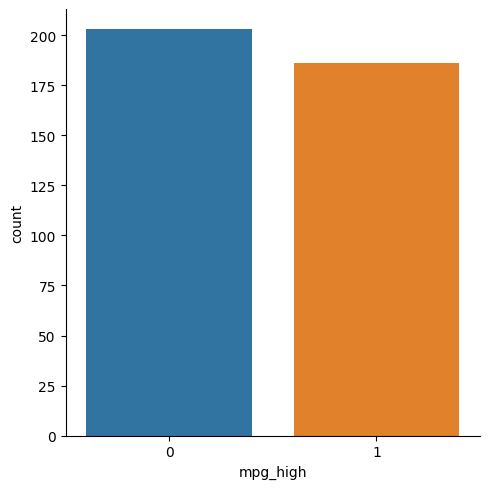

In [7]:
#MPG High Catplot
sb.catplot(x = "mpg_high", kind = "count", data=autodf)

It seems that mpg high seems evenly distributed, but there's more low_mpg cars

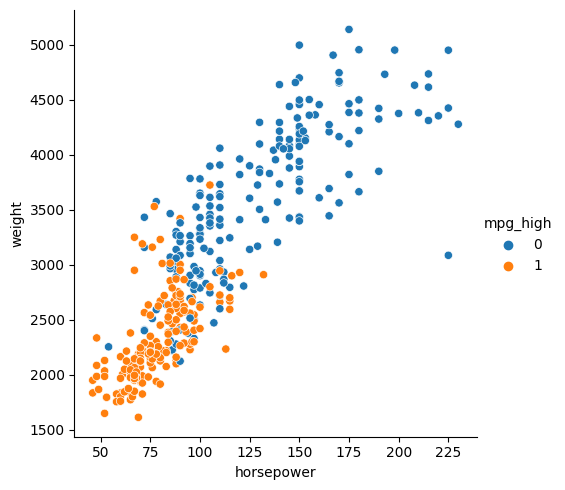

In [8]:
#Relplot 
sb.relplot(x = "horsepower", y = "weight", hue = "mpg_high", data = autodf)

The mpg_high seems clustered. High mpg is clustered on high horsepower and weight, while low mpg is clustered on low horsepower and weight.

<AxesSubplot: xlabel='mpg_high', ylabel='weight'>

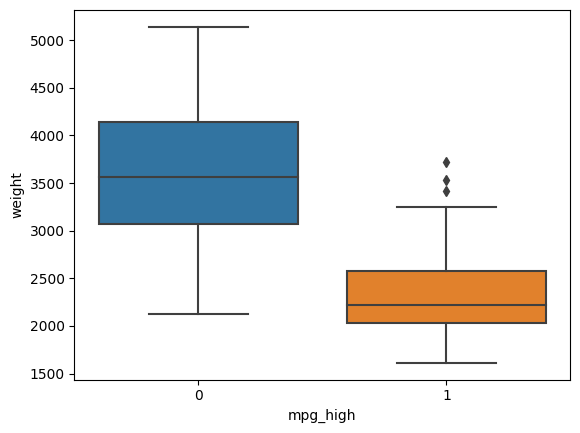

In [9]:
#Boxplot
sb.boxplot(x = "mpg_high", y = "weight", data = autodf)

The low mpg cars seems to have a higher average weight than high mpg cars. The quartiles and range seems to be larger on the low mpg cars compared to the high mpg cars. Mpg high cars also seem to have a tiny bit of outliers.

## Split Data to Train and Test

In [32]:
from sklearn.model_selection import train_test_split

#Obtain predictors and target columns
predictors = autodf.drop(columns=['mpg_high'])
target = autodf.mpg_high

#Split Data
predictorTrain, predictorTest, targetTrain, targetTest = train_test_split(predictors, target, test_size=.2, random_state=1234)

#Output Dimensions
print("Train Dimensions:", predictorTrain.shape)
print("Test Dimensions:", predictorTest.shape)

Train Dimensions: (311, 7)
Test Dimensions: (78, 7)


## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

#Make model
lr = LogisticRegression()
lr.fit(predictorTrain, targetTrain)
print("Score: ", lr.score(predictorTrain, targetTrain))

Score:  0.9067524115755627


/home/pretaxend/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Predict
predictions = lr.predict(predictorTest)

#Metrics
print("Accuracy: ", accuracy_score(targetTest, predictions))
print("Preicsion: ", precision_score(targetTest, predictions))
print("Recall: ", recall_score(targetTest, predictions))
print("F1: ", f1_score(targetTest, predictions))

Accuracy:  0.8589743589743589
Preicsion:  0.7297297297297297
Recall:  0.9642857142857143
F1:  0.8307692307692307


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier



## Neural Network